In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import json
import os
from pprint import pprint

In [20]:
#load CSV file
clean_crime_data = pd.read_csv("clean_crimeData.csv")

In [21]:
clean_crime_data.head()

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,...,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
0,8123749,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 9:30:00 PM,...,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
1,8123824,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 7:30:00 PM,...,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
2,8123835,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 11:00:00 PM,...,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
3,8127848,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10:00 AM,...,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
4,8120153,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00:00 PM,...,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent


## Which District Has More Crime?

In [22]:
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
CrimeDistrict_Cnt = pd.DataFrame(clean_crime_bin.groupby(["DISTRICT"])["CCN"].count())
CrimeDistrict_Cnt

,CCN
DISTRICT,
1.0,58364
2.0,54446
3.0,57316
4.0,44897
5.0,45495
6.0,43880
7.0,38205


Text(0.5,1,'% of Crimes by District')

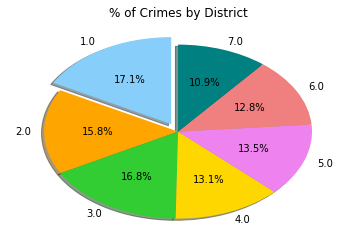

In [50]:
crime_by_dist = clean_crime_data.groupby('DISTRICT')
dist_sum = crime_by_dist.sum()['CCN']

labels = dist_sum.index
colors = ["lightskyblue", "orange", "limegreen", "gold", "violet", "lightcoral", "teal"]
explode = [.1, 0, 0, 0, 0, 0, 0]
plt.pie(dist_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
       shadow = True)
plt.title('% of Crimes by District')

## Type of Crime by District